In [29]:
import pandas as pd #to load and manipulate data and for One-Hot Encoding
import numpy as np #to calculate the mean and standard deviation
import matplotlib.pyplot as plt #to draw graphs 
from sklearn.tree import plot_tree # to draw a classificaton tree 
import seaborn as sns
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier #to build a classification tree 
from sklearn import tree
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')

In [18]:
wines = pd.read_csv("Data\wines.csv")
print(wines.shape)
wines.head()

(6497, 15)


,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,0,7.0,0.25,0.45,2.3,0.045,40.0,118.0,0.99064,3.16,0.48,11.9,7,white,medium
1,1,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7,white,medium
2,2,6.2,0.15,0.27,11.0,0.035,46.0,116.0,0.99602,3.12,0.38,9.1,6,white,medium
3,3,6.7,0.16,0.32,12.5,0.035,18.0,156.0,0.99666,2.88,0.36,9.0,6,white,medium
4,4,6.8,0.27,0.22,17.8,0.034,16.0,116.0,0.99890,3.07,0.53,9.2,5,white,low


In [19]:
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
wines.drop(columns=["Unnamed: 0"],inplace=True)

In [21]:
wines.drop(columns=[ "quality", "wine_type"], inplace=True)

In [22]:
X = wines.drop(columns=["quality_label"])
y = wines["quality_label"]

In [23]:
y


0       medium
1          low
2          low
3          low
4       medium
         ...  
6492    medium
6493       low
6494       low
6495    medium
6496       low
Name: quality_label, Length: 6497, dtype: object

In [24]:
# split data in train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
# create a decision tree and fit it to the training data 
# Decision tree with a maximum dept of 3 branches from the root to the leaf

clf = tree.DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

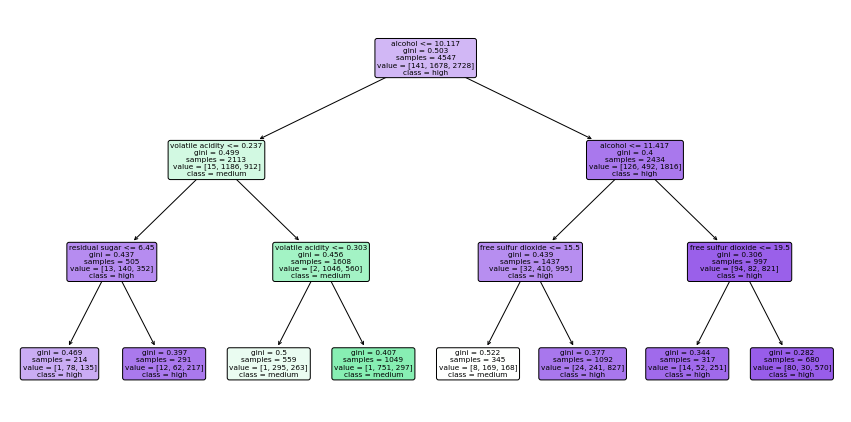

In [33]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf, filled=True, rounded=True, class_names=['low', 'medium', 'high'], feature_names= X.columns, max_depth=5);

In [34]:
clf.predict(X_test)

array(['medium', 'medium', 'low', ..., 'low', 'medium', 'low'],
      dtype=object)

In [38]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        57
         low       0.59      0.67      0.63       706
      medium       0.75      0.73      0.74      1187

    accuracy                           0.69      1950
   macro avg       0.45      0.47      0.46      1950
weighted avg       0.67      0.69      0.68      1950



In [39]:
clf.score(X_train, y_train)

0.7070595997360898

In [40]:
clf_scores = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
clf_scores

array([0.69769231, 0.68307692, 0.69053118, 0.70284834, 0.69053118])

In [41]:
wines["quality_label"].value_counts()

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64

In [42]:
# X -> definition of new dataset removing last 3 columns - including quality_label that is what I want to find out
wqp_features = wines.iloc[:,:-3]
# y-> creation of an array of values in column quality_label
wqp_class_labels = np.array(wines['quality_label'])
# creation of labels for quality_labels
wqp_label_names = ['low', 'medium', 'high']
# creation of a list with all columns names
wqp_feature_names = list(wqp_features.columns)
# split of training and testing data to be used in decision tree model
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,wqp_class_labels, test_size=0.3, random_state=42)

# counter gives me a visual over the data per type in a feature
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'medium': 2728, 'low': 1678, 'high': 141}) Counter({'medium': 1187, 'low': 706, 'high': 57})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH']


In [43]:
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [44]:
# train the model

wqp_dt = DecisionTreeClassifier(max_depth=8)
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions))

              precision    recall  f1-score   support

        high       0.16      0.05      0.08        57
         low       0.63      0.59      0.61       706
      medium       0.74      0.79      0.76      1187

    accuracy                           0.70      1950
   macro avg       0.51      0.48      0.48      1950
weighted avg       0.68      0.70      0.69      1950



In [45]:
wqp_label_names

['low', 'medium', 'high']

In [46]:
pd.Series(wqp_test_y).value_counts()

medium    1187
low        706
high        57
dtype: int64

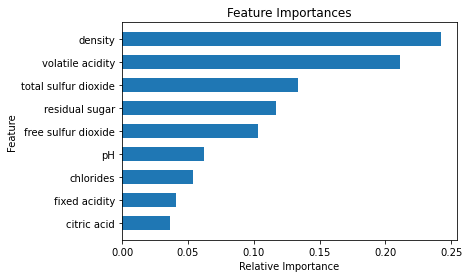

In [47]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances')

In [ ]:
# Parameters - Let’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.

In [51]:
dep_range = range(2,15)
train_scores=[]
for i in dep_range:
    wqp_dt = DecisionTreeClassifier(max_depth=i)
    wqp_dt.fit(X_train,y_train)
    train_scores.append(wqp_dt.score(X_train, y_train))

In [52]:
train_scores

[0.7068396745106664,
 0.7070595997360898,
 0.7261930943479217,
 0.7404882340004398,
 0.7657796349241258,
 0.789971409720695,
 0.815922586320651,
 0.8458324169782274,
 0.8797009016934242,
 0.9069716296459204,
 0.9263250494831757,
 0.9505168242797449,
 0.9674510666373433]

In [54]:
dep_range = range(2,30)
test_scores=[]
train_scores = []
for i in dep_range:
    wqp_dt = DecisionTreeClassifier(max_depth=i,splitter="best",class_weight="balanced")
    wqp_dt.fit(X_train,y_train)

    train_scores.append(wqp_dt.score(X_train,y_train))
    test_scores.append(wqp_dt.score(X_test, y_test))

In [55]:
train_scores

[0.6043545194633825,
 0.4387508247195953,
 0.5948977347701782,
 0.5359577743567188,
 0.6272267429074114,
 0.6564767978887178,
 0.7178359357818341,
 0.7692984385308995,
 0.815922586320651,
 0.8539696503188916,
 0.8858588080052782,
 0.9074114800967671,
 0.9256652738069057,
 0.9384209368814603,
 0.951176599956015,
 0.9643721134814163,
 0.9753683747525841,
 0.9797668792610512,
 0.9843853089949417,
 0.9918627666593358,
 0.9949417198152628,
 0.9967011216186497,
 0.9962612711678029,
 0.9995601495491533,
 0.9989003738728832,
 0.9995601495491533,
 1.0,
 1.0]

In [56]:
test_scores

[0.5882051282051282,
 0.4246153846153846,
 0.5723076923076923,
 0.49641025641025643,
 0.5835897435897436,
 0.598974358974359,
 0.6394871794871795,
 0.6476923076923077,
 0.66,
 0.6682051282051282,
 0.6774358974358974,
 0.6902564102564103,
 0.6902564102564103,
 0.7015384615384616,
 0.7020512820512821,
 0.7138461538461538,
 0.7138461538461538,
 0.717948717948718,
 0.72,
 0.7241025641025641,
 0.7220512820512821,
 0.7220512820512821,
 0.7235897435897436,
 0.7235897435897436,
 0.7271794871794872,
 0.7246153846153847,
 0.7230769230769231,
 0.7276923076923076]

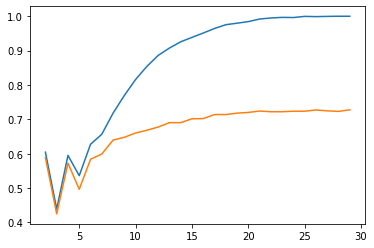

In [57]:
sns.lineplot(x= list(range(2,30)), y= train_scores);
sns.lineplot(x= list(range(2,30)), y= test_scores);